<a href="https://colab.research.google.com/github/kteppris/RealWaste/blob/main/1_Hauptnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einleitung

Die korrekte Trennung von Deponieabfällen ist ein zentrales Thema in der Abfallwirtschaft, das zahlreiche Herausforderungen mit sich bringt. Vor diesem Hintergrund widmet sich die vorliegende Arbeit der Anwendung verschiedener Machine-Learning-Modelle zur Klassifizierung von Mülldeponieabfällen.

Eine strukturierte Vorgehensweise ist für die erfolgreiche Durchführung von Data-Science-Projekten unerlässlich. Das Data Science Project Management Model (DASC-PM) von [Schulz et al. 2022](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf) bietet einen solchen strukturierten Ansatz und dient als Leitfaden für das Management von Data-Science-Projekten. Es gliedert Projekte in klare Phasen und Schritte, von der Ideenfindung bis zur Implementierung.

Die Phasen des DASC-PM umfassen den Projektauftrag, die Datenbereitstellung, die Analyse, die Nutzbarmachung und die Nutzung der erzeugten Artefakte. Jede Phase ist wichtig für den Erfolg des Projekts und erfordert eine sorgfältige Planung und Durchführung. Die nachfolgende Arbeit orientiert sich an diesen Projektphasen und strukturiert ihre Gliederung entsprechend. Diese strukturierte Vorgehensweise trägt hinzukommend dazu bei, die Aspekte "Domänenverständnis", "Datenvorverarbeitung", "Analyse" und "Visualisierung" an geeigneten Stellen einzubeziehen.

Im weiteren Verlauf der Arbeit wird das nachfolgend beschriebene **Vorgehen** verfolgt.

In der Phase des **Projektauftrags** werden der fachliche Hintergrund sowie die Problemstellung der Müllklassifizierung erläutert. Weitergehend wird die Zielsetzung der Arbeit herausgearbeitet sowie ihre organisatorischen Rahmenbedingungen beschrieben.

Anschließend wird in der Phase der **Datenbereitstellung** der Datensatz beschrieben sowie seine Wahl begründet. Weiterführend werden die zur Analyse benötigten Datenerfassungs- und vorverarbeitungsschritte durchgeführt und erklärt. Im Rahmen einer explorativen Datenanalyse wird der Datensatz untersucht sowie visualisiert. Zusätzlich werden in diser Phase Features extrahiert und für das Training von klassischen ML-Methoden, wie KNN, SVM und Random Forest verwendet.

Die Phase der **Analyse** beschäftigt sich mit dem Trainieren ausgewählter Modelle sowie mit der Durchführung verschiedener Augmentationstechniken und Hyperparameter-Tuning. In diesem Rahmen wird eine eigene CNN-Struktur ohne vortrainierte BackBones sowie vortrainierte Modelle mithilfe von Transfer-Learning trainiert. Zu diesen zählen InceptionV3, VGG16, DenseNet201, ResNet50 und AlexNet. Des weiteren wird ein Vision Transformer trainiert. Zusätzlich werden die Modelle mit neuen, von dem Projektteam aufgenommenen Bildern getestet, um die Robustheit der Algorithmen zu bewerten.

In der Phase der **Nutzbarmachung** werden die Ergebnisse der verwendeten Modellansätze interpretiert, anhand vorab definierter Bewertungskriterien miteinander verglichen sowie visuell aufbereitet.

Die Arbeit schließt mit der Phase der **Nutzung**, welche einen Ausblick, die Vorstellung möglicher Anwendungsfelder für die erarbeiteten Modelle sowie eine kritische Reflektion der Arbeit umfasst.


# Projektauftrag

Die erste Phase eines Projekts im Sinne des DASC-PM von [Schulz et al. 2022](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf) stellt der Projektauftrag dar. Dieser ist der Auslöser eines Data-Science-Projekts. Er definiert eine Problemstellung innerhalb einer Domäne, welche das Projektziel sowie den fachlichen Zweck der zu erarbeitenden Lösung beschreibt. ([ebd., S. 19-20](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf))

## Hintergrund und Problemstellung


Die Klassifizierung von Müll spielt eine entscheidende Rolle in der heutigen Gesellschaft, da das Bewusstsein für Umweltschutz und nachhaltige Ressourcennutzung stetig wächst. Eine effiziente Müllklassifizierung ermöglicht nicht nur eine wirksame Abfallbewirtschaftung, sondern trägt auch maßgeblich zur Erhaltung der Natur und zur Vermeidung von Umweltverschmutzung bei. Durch die richtige Sortierung und Entsorgung von Abfällen können wertvolle Ressourcen wiederverwendet und recycelt werden, während gleichzeitig die Ausbreitung von Krankheiten und die Belastung der Umwelt reduziert werden können. [Adedeji et al. 2019](https://www.sciencedirect.com/science/article/pii/S2351978919307231)

Angesichts der stetig steigenden Müllmengen und der damit verbundenen Herausforderungen ist eine präzise Klassifizierung und effektive Bewirtschaftung von Müll von größter Bedeutung für eine nachhaltige Zukunft. Traditionelle Ansätze zur Müllklassifizierung wie manuelle Sortierung, visuelle Inspektion sowie Wiegen und Volumenmessung sind nach wie vor weit verbreitet, weisen jedoch bestimmte Nachteile auf. [Tiyajarmon et al. 2019](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9095775)

Das manuelle Sortieren bezeichnet die physische Trennung verschiedener Arten von Müll durch Arbeitskräfte. Neben den Gesundheitsrisiken für die sortierenden Personen aufgrund der schädlichen Substanzen im Müll [Adedeji et al. 2019](https://www.sciencedirect.com/science/article/pii/S2351978919307231), leidet diese Methode unter ihrer Subjektivität sowie ihrer mangelden Skalierbarkeit. Die visuelle Inspektion [Abood und Al-Talib 2023](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjxy4OX78uEAxUBQvEDHZFCAPIQFnoECCgQAQ&url=https%3A%2F%2Ftechniumscience.com%2Findex.php%2Ftechnium%2Farticle%2Fview%2F8345%2F3035&usg=AOvVaw3JSmdwmZbql3AHGJJ_m0qY&opi=89978449) stützt sich ebenfalls auf das Fachwissen von Arbeitskräften um den Abfall anhand seines Erscheinungsbildes zu klassifizieren und leidet in gleicher Weise unter Subjektivität und mangelnder Skalierbarkeit. Wiege- und Volumenmessungstechniken quantifizieren Abfall durch die Messung seines Gewichts oder Volumens und liefern wertvolle Informationen für die Abfallschätzung und –managementplanung, sind aber fehleranfällig bei der Erfassung von kleinen oder unregelmäßig geformten Abfällen.

Zusammenfassend lässt sich sagen, dass diese traditionellen Ansätze ihre Nützlichkeit haben, jedoch aufgrund der soeben beleuchteten Kritikpunkte eingeschränkt sind.  

Maschinelle Lernansätze hingegen haben sich als leistungsstarke Werkzeuge in der Abfallerkennung und -klassifizierung etabliert. Bildverarbeitungs- und Computer-Vision-Techniken, kombiniert mit maschinellen Lernalgorithmen, ermöglichen die automatisierte Abfallerkennung und -klassifizierung basierend auf visuellen Merkmalen. Diese Ansätze analysieren Bilder oder Videomaterial, um verschiedene Arten von Abfall zu identifizieren und zu kategorisieren, wodurch die soeben beschriebenen Herausforderungen bewältigt werden. [Single et al. 2023](https://www.mdpi.com/2078-2489/14/12/633)

## Zielsetzung

### Stakeholder

Bei der Durchführung des Projekts zur Entwicklung eines präzisen Müllklassifizierungsmodells sind mehrere potenzielle Stakeholder zu identifizieren, die ein Interesse an den Ergebnissen und Erkenntnissen des Projektes haben könnten. Die Stakeholder dieses Projekts umfassen neben dem Dozenten und den Kommilitonen verschiedene Interessengruppen.  

Zu den wichtigsten Stakeholdern gehören potenzielle **Geschäftspartner**, wie beispielsweise Mülldeponiebetreiber oder Hersteller von Müllsortieranlagen. Diese könnten ein wirtschaftliches Interesse an effizienteren Müllklassifizierungstechnologien haben sowie mögliche Partner für die Implementierung darstellen. Ferner könnten **Regierungsbehörden**, insbesondere Umweltbehörden Interesse daran haben, die Abfallwirtschaft zu verbessern sowie die Kommunikation der Ergebnisse des Projektes zu nutzen, um politische Unterstützung zu gewinnen. **Umweltschutzorganisationen** könnten von verbesserten Müllklassifizierungstechnologien profitieren, um die Recyclingbemühungen zu unterstützen und die Umweltbelastung zu verringern. Darüber hinaus sind **Verbraucher** als Interssensgruppe zu berücksichtigen, welche von einem effizienteren Müllmanagement ihrer Gemeinde profitieren könnten. **Forschungsinstitute**, insbesondere Einrichtungen, die sich mit ähnlichen Themen befassen, könnten an den Ergebnissen und Erkenntnissen des Projektes interessiert sein, um Inspiration für ihre eigenen Forschungsarbeiten zu gewinnen. Schließlich können auch **Lieferanten** von Technologien oder Dienstleistungen für die Müllklassifizierung als Stakeholder betrachtet werden, da sie möglicherweise zukünftig als Partner für die Implementierung der entwickelten Lösungen fungieren.  

Die Identifizierung und Einbindung dieser Stakeholder-Gruppen kann dazu beitragen, das Projekt zu unterstützen, Ressourcen bereitzustellen, zusätzliche Perspektiven einzubringen und die potenzielle Anwendbarkeit der entwickelten Lösungen zu maximieren.




### Projekterfolg

Der Erfolg dieses Projektes wird anhand mehrerer, nachfolgend genannter Erfolgskriterien definiert.

Zunächst steht die **Vorhersagegenauigkeit** des Modells im Vordergrund. Um einen Zielwert zu bestimmen, werden zwei Referenzwerte herangezogen. Zum einen wird angestrebt, die 89,91%ige Klassifizierungsgenauigkeit des Modells von [Single et al. 2023](https://www.mdpi.com/2078-2489/14/12/633) zu erreichen oder sogar zu übertreffen. Zudem wird die Klassifizierungsgenauigkeit traditioneller Methoden wie Volumenmessung, Wiegen oder manuelle Sortierung berücksichtigt, von denen angenommen wird, dass sie eine Klassifizierungsgenauigkeit von ungefähr 90% erzielen. Daraus folgend wird angestrebt, eine Klassifizierungsgenauigkeit von über 90% zu erzielen, unter Beibehaltung von vergleichbar guten Werten bei anderen Metriken, wie beispielsweise F1, Precision oder Recall.

Ferner wird die Effizienz des Modells anhand von Kriterien wie **Inferenzzeit, Modellgröße und Komplexität** bewertet. Ein erfolgreiches Modell sollte neben einer hohen Vorhersagegenauigkeit schnelle Vorhersagen ermöglichen sowie eine ressourcensparende Modellgröße aufweisen.

Des weiteren soll die Robustheit und **Generalisierbarkeit** des Modells  durch Tests mit neuen, nicht im RealWaste-Datensatz enthaltenen Bildern bewertet werden. Ein erfolgreiches und verallgemeinerbares Modell sollte in der Lage sein, Mülldeponieabfälle auch außerhalb des Trainingsdatensatzes korrekt zu klassifizieren.

Schließlich kann der **praktische Nutzen** des in dem Projekt erarbeiteten Artefakts als Indikator für den Erfolg von diesem dienen. Ein erfolgreiches Projekt sollte einen Mehrwert für potenzielle Stakeholder bieten sowie neue Erkenntnisse liefern.

Zusätzlich zu den soeben genannte **Erfolgskriterien** verfolgt das Projekt die Beantwortung folgender, konkreter Fragestellungen:

* Welcher der verwendeten Modelle eignet sich am besten für die Klassifizierung der Bilder aus dem RealWaste-Datensatz?
* Inwiefern lassen sich die Modellergebnisse durch Augmentations oder Hyperparameter-Tuning weiter verbessern?
* Gelingt es dem Projektteam, ein Modell mit einer höheren Klassifizierungsgenauigkeit als das beste Modell von Single et al. (2023) entwickelte Modell mit einer Vorhersagegenauigkeit von 89,91% zu trainieren?
* In welchem Umfang ist das beste Modell dazu geeignet, neue, durch die Teammitglieder selbst aufgenommene, Bilder korrekt zu klassifizieren?



### Abgrenzung

Die vorliegende Ausarbeitung bezieht sich auf die Arbeit von [Single et al. 2023](https://www.mdpi.com/2078-2489/14/12/633), in welcher die Effektivität verschiedener CNNs zur Klassifizierung des RealWaste-Datensatzes vergleichend untersucht und eine Accuracy von 89.19% für das leistungssärkste Modell (Inception V3) erreicht werden konnte.
Im Rahmen dieser Ausarbeitung werden klassische ML-Modelle wie KNN, SVM und Random Forest im Rahmen einer Explorativen Datenanalyse eingesetzt, um einen Proof of Concept für extrahierte Features aus dem Datensatz zu liefern. Darüber hinaus untersuchen wir die Anwendbarkeit dieser Modelle auf außerhalb des RealWaste-Datensatzes gesammelte Bilder, um die Robustheit und Generalisierbarkeit unserer Lösungen zu bewerten. Durch die Integration von vorab trainierten Modellen als Backbones in unsere Architektur streben wir eine verbesserte Klassifikationsgenauigkeit und Effizienz im Vergleich zu vollständig neuen Modellen an. Diese methodische Erweiterung soll es ermöglichen, über die in der Studie von Single et al. erreichte Klassifikationsgenauigkeit hinauszugehen und neue Wege für die Anwendung von Deep Learning in der Abfallklassifizierung in Bezug auf den RealWaste-Datensatz zu eröffnen.

Konkrete Abgrenzung:
* Wir führen eine ausführliche EDA durch
* Wir machen klassische Methoden
* Bei uns steht nicht der Vegleich zweier Datensätze im Vordergrund
* Wir trainieren zusätzlich zu auf Backbones basierenden DL-Modellen ein eigenes CNN und einen Vision Transformer
* Wir haben zusätzlich eigene Testdaten erstellt
* Größerer Fokus auf Ergebnisvisualisierung
* Größerer Umfang

## Organisatorische Rahmenbedingungen

**Ressourcen und Fähigkeiten**

Bei der Durchführung eines Gruppenprojekts spielt die effektive Zuweisung von Aufgaben und die Nutzung der individuellen Ressourcen und Fähigkeiten jedes Teammitglieds eine entscheidende Rolle für den Erfolg. Es ist wichtig zu betonen, dass die Beteiligten an diesem Projekt über sehr heterogene Vorkenntnisse verfügen. Dies ist bei bei der Verteilung der Aufgaben sowie bei dem angestrebten Kompetenzgewinn zu berücksichtigen. Die Zuweisung der Aufgaben erfolgte entsprechend der Fachkenntnisse sowie der persönlichen Interessen und Entwicklungswünschen der Teammitglieder. Auf diese Weise wird einerseits eine effiziente Zusammenarbeit und die Erreichung der zuvor genannten Zielsetzung ermöglicht, andererseits aber auch ein Kompetenzgewinn für alle Beteiligten angestrebt.


**Risikobewertung**

Die Durchführung des folgenden Projekts birgt verschiedene Risiken. Einerseits ist die begrenzte Zeit zu bedenken, was eine vollständige Fertigstellung des Projekts gefährden könnte. Andererseits sind technische Risiken wie beispielsweise unzulängliche Rechenressourcen zu beachten. Des Weiteren müssen potenzielle personelle Ausfälle aufgrund von Krankheit oder anderen unvorhergesehenen Umständen berücksichtigt werden.

**Projektplanung**

Für die effiziente Organisation der Arbeit wird **Trello** als Projektplanungsinstrument genutzt. Durch die Verwendung des Trello-Boards können Aufgaben klar zugewiesen, Prioritäten gesetzt und ein strukturierter Zeitplan erstellt werden. Die Anwendung ermöglicht zudem eine allgemeine Übersicht über den Fortschritt des Projekts sowie die deutliche Darstellung von Meilensteinen und externen Abhängigkeiten. Ziel ist es, durch diese Methode der Projektplanung einen reibungslosen Ablauf zu gewährleisten sowie mögliche zeitliche Engpässe frühzeitig zu identifizieren. [Trello 2023](https://trello.com/home)


In diesem Projekt wird **GitHub** als Kollaborationsplattform verwendet, um eine effiziente und transparente Zusammenarbeit zwischen den Projektteilnehmern zu ermöglichen. GitHub bietet eine Reihe von Funktionen, die für die Verwaltung von Code, das Tracking von Änderungen und das gemeinsame Arbeiten an Data-Science-Projekten unerlässlich sind. Durch die Verwendung von GitHub können die Projektmitglieder gleichzeitig an verschiedenen Teilen des Codes arbeiten, Änderungen verfolgen und kommentieren sowie Feedback austauschen. Darüber hinaus erleichtert GitHub die Integration von Versionskontrolle, was die Verwaltung von Codeänderungen und die Rückverfolgbarkeit von Entwicklungsaktivitäten verbessert. Die Verwendung von GitHub fördert eine kollaborative Arbeitsweise und trägt zur Effizienz und Qualität des Gruppenprojekts bei. [GitHub, Inc 2023](https://docs.github.com/de/get-started/using-git/about-git)

# Datenbereitstellung

Die zweite Phase eines Projekts im Sinne des DASC-PM von [Schulz et al. 2022](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf) stellt die Datenbereitstellung dar. Diese beschäftigt sich mit der Auswahl der für die Analyse benötigten Daten aus den Ursprungsdatenquellen sowie ihrer Aufbereitung, ihrem Management und der explorativen Analyse. Das Ergebnis dieser Phase ist eine Datenquelle, welche für die nachfolgende Phase geeignet ist. ([ebd., S. 19-20](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf))

***
$$
⟹\text{Data Wrangling}
$$
***
* Datenerfassung und Vorverarbeitung
  * Erfassung der Daten
  * Prüfung und Säuberung der Daten
* Datenintegration und Transformation
  * Integration verschiedener Datensätze
  * Transformation der Daten für die Analyse
* Dokumentation und explorative Datenanalyse
  * Dokumentation der Schritte bei der Datenbereitstellung
  * Explorative Datenanalyse und Erkundung der Datensätze

***

* Download der Ordner und Einbinden beschreiben
* Bildgrößen Prüfen
* Klassenordner prüfen
* Anzahl der Bilder prüfen
* prüfen, dass die Bilder größer als 0KB sind


## Datensatz

Der RealWaste-Datensatz ist eine umfangreiche Sammlung farbiger Bilder von Abfallmaterial, das an der Annahmestelle der Mülldeponie Whyte's Gully Waste and Resource Recovery Facility in Wollongong NSW, Australien, aufgenommen wurde. Jedes Bild hat eine Auflösung von 524x524 Pixeln und ist mit einem Label versehen, das die Art des Materials und somit die Abfallkategorie identifiziert. Die Anzahl der Bilder pro Kategorie variiert, wobei *Cardboard* 461, *Food Organics* 411, *Glass* 420, *Metal* 790, *Miscellaneous Trash* 495, *Paper* 500, *Plastic* 921, *Textile Trash* 318 und *Vegetation* 436 Bilder umfasst. Es sind keine fehlenden Werte im Datensatz vorhanden. [UC Irvine 2023](https://archive.ics.uci.edu/dataset/908/realwaste)

Der RealWaste-Datensatz wurde im Rahmen einer Abschlussarbeit erstellt, die das Verhalten von Convolutional Neural Networks untersucht. Diese vergleicht, wie sich diese Netzwerke bei der Verarbeitung von reinen und unverfälschten Objekten im Vergleich zum Training mit echten Abfallgegenständen auf authentischem Abfallmaterial verhalten. [Single et al. 2023](https://www.mdpi.com/2078-2489/14/12/633)

Die Entscheidung, diesen Datensatz für vorliegendes Projekt zu verwenden basiert auf mehreren Gründen. Erstens ist das Thema der Müllklassifizierung, wie in der Einleitung beschrieben, von großer Relevanz, da es sich um ein aktuelles und drängendes Umweltproblem handelt. Zweitens bietet der RealWaste-Datensatz eine realistische Grundlage für die Untersuchung dieses Themas, da die enthaltenen Bilder direkt von einer Mülldeponie aufgenommen wurden, was eine authentische Darstellung der Müllumgebung gewährleistet. Drittens ist der Datensatz aufgrund seines Entstehungsdatums im Jahr 2023 sehr aktuell, was bedeutet, dass er die neuesten Trends und Entwicklungen in Bezug auf die Müllklassifizierung widerspiegelt. Viertens haben die Urheber des Datensatzes ein Paper zu ihrer Forschung veröffentlicht, das jedoch keinen begleitenden Code enthält. Diese Tatsache, zusammen mit der Neuheit des Datensatzes, bietet die Möglichkeit, zahlreiche neue Erkenntnisse zu gewinnen und zu entdecken.

## Datenerfassung

Da der beschriebene Datensatz aus dem vorherigen Absatz bereits verfügbar ist, entfällt die Notwendigkeit einer speziellen Datenerfassung.


Allerdings werden im Rahmen dieser Arbeit **eigene Testdaten erstellt**, um die Generalisierbarkeit der entwickelten Modelle zu überprüfen. Diese Testdaten bestehen aus selbst-fotografierten Bildern von echtem Müll in Hamburg, wodurch die Bedingungen auf einer Mülldeponie simuliert werden sollen. Ein besonderes Augenmerk liegt darauf, den Realismus des ursprünglichen Testdatensatzes beizubehalten und die Rahmenbedingungen der Aufnahmen so ähnlich wie möglich zu gestalten. Zu diesem Zweck werden die Aufnahmen vor einem grauen Hintergrund gemacht, der dem Hintergrund der Originalbilder ähnelt. Die Bilder werden im Quadrat-Format aufgenommen und anschließend auf eine Bildgröße von 524x524 Pixeln und 300 dpi reduziert, um die Einstellungen des Trainingsdatensatzes abzubilden. Insgesamt werden 105 Bilder aufgenommen, die sich wie folgt auf die neun Kategorien verteilen: Cardboard 10, Food Organics 10, Glass 10, Metal 10, Miscellaneous Trash 10 Paper 10, Plastic 25, Textile Trash 10 und Vegetation 10 . Diese selbst-erstellten Testdaten dienen dazu, die Leistungsfähigkeit der Modelle unter realistischen Bedingungen zu bewerten und ihre Fähigkeit zur Klassifizierung von neuen, nicht dem ursprünglichen Datensatz entstammenden Bildern zu testen.  

## Umgebung vorbereiten und Daten laden

Für die <b>Datenvorbereitung</b> wird der von Single et al. erstellte RealWaste-Datensatz ([Single 2023](https://github.com/sam-single/realwaste)) aus dem Git Repository von Sam Single geladen. Die Bilder des Datensatzes sind bereits nach Klassen geordnet sowie in ein nutzbares Format gebracht. Dennoch wird der Datensatz auf korrupte Dateien, Nicht-Bild-Dateien sowie leere Ordner geprüft.

Die <b>Datentransformation</b> kann hingegen erst vor dem jeweiligen Anwendungsfall durchgeführt werden, da jeder Anwendungsfall unterschiedliche Parameter benötigt.

Um das Notebook nachvollziehen und ausführen zu können, werden alle notwendingen <b>Pakete</b> installiert. Die Daten werden in einem Format <b>integriert</b>, sodass alle Anwendungsfälle in den begleitenden Notebooks auf gleiche Art und Weise auf die Daten zugreifen können. Dies wird sichergestellt, indem anfangs in jedem Notebook der Datenpfad spezifiziert wird.

Ein besonderer Fall bezüglich des Datenzugriffs tritt bei der Nutzung von **Google Colab** auf. In Colab werden neue Notebooks (Sub-Notebooks) stets in einer neuen Session geöffnet. Um das Problem zu umgehen, dass sämtliche Inhalte einer Session verloren gehen, werden sowohl der Code als auch die Daten immer im Google Drive in einem festgelegten Pfad gespeichert. Dadurch können die Subnotebooks sequenziell geöffnet werden, wodurch stets auf denselben Pfad zugegriffen werden kann.

In [ ]:
from pathlib import Path
import os
import sys
import shutil
import subprocess

# Funktion, die prüft, ob dieses Skript in Colab ausgeführt wird
def in_colab():
    # sys beinhaltet alle bereits geladenen Pakete
    return 'google.colab' in sys.modules  # google.colab wird automatisch in Colab vorgeladen, daher Indiz für Colab Environment

# Google Drive für permanente Speicherung der Daten und Ergebnisse mounten
def mount_google_drive():
    if in_colab():
        from google.colab import drive
        drive.mount('/content/drive')
        print("Google Drive wurde eingebunden.")

# Unser Code-Repo in Google Drive clonen oder prüfen, ob es bereits existiert
def clone_code_repo_to_drive(target_dir):
    if not target_dir.exists():
        print(f"Klone das Code Repository nach {target_dir}...")
        result = subprocess.run(["git", "clone", "https://github.com/kteppris/RealWaste.git", str(target_dir)], capture_output=True, text=True)
        if result.returncode == 0:
            print("Code Repository erfolgreich geklont.")
        else:
            print("Fehler beim Klonen des Code Repositories:", result.stderr)
    else:
        print("Code Repository existiert bereits.")
    os.chdir(target_dir)  # Wechseln in das Verzeichnis des geklonten Repositories
    print(f"Working Directory gewechselt zu: {Path.cwd()}")

# Daten Repository klonen und aufräumen
def clone_and_prepare_data_repo(repo_url, target_dir):
    if not target_dir.exists():
        print(f"Klone das Daten Repository nach {target_dir}...")
        subprocess.run(["git", "clone", repo_url, str(target_dir)])

    realwaste_dir = target_dir / 'RealWaste'
    if realwaste_dir.exists():
        for item in realwaste_dir.iterdir():
            shutil.move(str(item), str(target_dir))
        shutil.rmtree(realwaste_dir)

    git_dir = target_dir / '.git'
    readme_file = target_dir / 'README.md'
    if git_dir.exists():
        shutil.rmtree(git_dir)
    if readme_file.exists():
        readme_file.unlink()

    print("Daten Repository wurde vorbereitet.")
    return target_dir

# Abhängigkeiten installieren
def install_requirements():
    print("Installiere benötigte Pakete...")
    subprocess.run(["pip", "install", "-r", "requirements.txt"])

# Setup-Prozess starten
data_repo_url = "https://github.com/sam-single/realwaste.git"
code_repo_path = Path("/content/drive/MyDrive/MADS/RealWaste") if in_colab() else Path.cwd()

if in_colab():
    mount_google_drive()
    clone_code_repo_to_drive(code_repo_path)
    data_path = clone_and_prepare_data_repo(data_repo_url, code_repo_path / "data")
else:
    # Lokal sollte der Code bereits vorhanden sein; nur das Daten-Repository wird geklont
    data_path = clone_and_prepare_data_repo(data_repo_url, code_repo_path / "data")

install_requirements()

print(f"Setup abgeschlossen. Datenpfad: {data_path}")


## Datenprüfung und -säuberung



In [ ]:
from pathlib import Path
import os

# Globale Variable für erlaubte Bildformate
ALLOWED_IMAGE_EXTENSIONS = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

def check_only_folders_in_root(data_path):
    """
    Prüft, ob im Wurzelverzeichnis nur Ordner existieren.
    """
    for item in data_path.iterdir():
        if not item.is_dir():
            raise ValueError(f"Unerwartetes Datei- oder Verzeichniselement im Wurzelverzeichnis: {item}")

def check_folders_have_only_images(data_path):
    """
    Prüft, ob jeder Ordner ausschließlich Bilder enthält.
    """
    for class_folder in data_path.iterdir():
        if class_folder.is_dir():
            for file in class_folder.iterdir():
                if not file.suffix in ALLOWED_IMAGE_EXTENSIONS:
                    raise ValueError(f"Unerwartetes Dateiformat in {class_folder}: {file}")

def check_no_empty_folders(data_path):
    """
    Stellt sicher, dass keine Ordner leer sind.
    """
    for class_folder in data_path.iterdir():
        if class_folder.is_dir() and not any(class_folder.iterdir()):
            raise ValueError(f"Leerer Ordner gefunden: {class_folder}")

def check_file_names(data_path):
    """
    Überprüft, ob Dateinamen gültige Zeichen enthalten.
    """
    for class_folder in data_path.iterdir():
        if class_folder.is_dir():
            for file in class_folder.iterdir():
                if not file.name.isascii() or "/" in file.name or "\\" in file.name:
                    raise ValueError(f"Ungültiger Dateiname in {class_folder}: {file}")

def run_checks(data_path):
    """
    Führt alle Prüfungen auf den Datenordner aus.
    """
    print("Starte Daten-Checks...")
    check_only_folders_in_root(data_path)
    check_folders_have_only_images(data_path)
    check_no_empty_folders(data_path)
    check_file_names(data_path)
    print("Alle Checks erfolgreich abgeschlossen.")

# Aufruf der Funktionen zur überprüfung der Datensatz vollständigkeit und Korrektheit
run_checks(data_path)


Starte Daten-Checks...
Alle Checks erfolgreich abgeschlossen.


## Explorative Datenanalyse

$$
⟹\text{Absprung in 02_EDA_Notebook}
$$

Die explorative Datenanalyse befindet sich in dem Notebook 02.

# Analyse

Die dritte Phase eines Projekts im Sinne des DASC-PM von [Schulz et al. 2022](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf) stellt die Analyse dar. Das Ziel der Analyse ist es, ein geeignetes Analyseverfahren auf die im vorigen Schritt aufbereitete analytische Datenquelle anzuwenden und hierdurch die gewünschten Analyseergebnisse zu erhalten. ([ebd., S. 19-20](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf))

$$
⟹\text{Absprung in 03_DeepLearning}
$$

## Auswahl der Analysemethoden

Die Auswahl der Analysemethoden befindet sich in den Notebooks 02 und 03.

## Modell-Entwicklung

Die Modell-Entwicklung befindet sich in den Notebooks 02 und 03.

## Modell-Tuning

Das Modell-Tuning befindet sich in den Notebooks 02 und 03.

# Nutzbarmachung

Die vierte Phase eines Projekts im Sinne des DASC-PM von [Schulz et al. 2022](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf) stellt die Nutzbarmachung dar. Die Phase der Nutzbarmachung hat als Ergebnis eine anwendbare Form der Analyseergebnisse. Die geschaffenen Analyseartefakte, welche sowohl Resultate als auch Modelle oder Verfahren selbst umfassen können, werden den Nutzern in unterschiedlicher Form zur Verfügung gestellt. ([ebd., S. 19-20](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf))

## Ergebnisse



Im Rahmen dieser Arbeit wurden verschiedene Ansätze angewendet, um den Datensatz zu analysieren. Sowohl klassische ML-Methoden wie k-Nearest Neighbors, Support Vector Machine und Random Forest, als auch Deep-Learning-Verfahren, darunter eine eigene CNN-Struktur ohne vortrainierte Backbones sowie die vortrainierten Modelle InceptionV3, VGG16, DenseNet201, ResNet50 und AlexNet, wurden auf den Datensatz angewendet. Darüber hinaus wurde ein Vision Transformer eingesetzt. Der nachfolgende Abschnitt bietet einen Vergleich der einzelnen Verfahren hinsichtlich ihrer Klassifizierungsgenauigkeit sowie ihrer Effizienz.

In [142]:
import random
from pathlib import Path
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

class DLResultsExplorer:
    def __init__(self, root_path):
        self.root_path = Path(root_path)
        self.current_model = None
    
    def set_model(self, model_name: str, version: str):
        self.current_model = model_name
        self.version = version
    
    def available_models(self):
        models = [x.name for x in (self.root_path / 'results').iterdir() if x.is_dir()]
        current_model = self.current_model
        for model_name in models:
            self.current_model = model_name
            print(f"Modelname: {model_name}")
            print(f"Versions: {self.list_versions()}")
            print("-"*30)
            print("\n")
        self.current_model = current_model

    def list_versions(self): 
        return [x.name for x in (self.root_path / 'results' / self.current_model / 'images').iterdir() if x.is_dir()]

    def display_random_images_from_classes(self, stage="val", n=1, label_filter=None):
        """
        Randomly selects and displays n images from each class subfolder within the specified stage (test/val),
        optionally filtering by a label part (e.g., "FP", "FN"). Dynamically adjusts the figure size based on the
        actual number of images selected to maintain consistent subplot sizes.
        """
        base_path = self.root_path / 'results' / self.current_model / 'images' / self.version / stage
        class_folders = [x for x in base_path.iterdir() if x.is_dir()]
        
        selected_images = []  # Collect all selected images here

        for folder in class_folders:
            # Optionally filter images by label
            images = [img for img in folder.glob('*.png') if label_filter in img.name] if label_filter else list(folder.glob('*.png'))
            selected_images.extend(random.sample(images, min(n, len(images))) if images else [])

        total_images = len(selected_images)
        if total_images == 0:
            print("No images found matching the criteria.")
            return
        
        # Adjust figure size based on the number of images
        grid_size = int(total_images ** 0.5) + 1
        num_rows = (total_images // grid_size) + (1 if total_images % grid_size else 0)
        subplot_size = 4  # Approximate size for each subplot in inches
        fig_width = grid_size * subplot_size
        fig_height = num_rows * subplot_size

        fig, axs = plt.subplots(num_rows, grid_size, figsize=(fig_width, fig_height), squeeze=False)
        current_ax = 0

        for img_path in selected_images:
            row, col = divmod(current_ax, grid_size)
            img = plt.imread(img_path)
            axs[row, col].imshow(img)
            axs[row, col].set_title(f"{img_path.parent.name}/{img_path.name}")
            axs[row, col].axis('off')
            current_ax += 1

        # Hide unused axes
        for ax in axs.flatten()[current_ax:]:
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    def plot_confusion_matrix(self, stage="val"):
        """
        Reads the confusion matrix CSV for the specified version and type (test/val).
        """
        path = self.root_path / 'results' / self.current_model / 'logs' / self.version / stage / 'confusion_matrix.csv'
        df = pd.read_csv(path, index_col=0)
        # Create the heatmap using seaborn
        plt.figure(figsize=(12, 9))  # Adjust the size as needed
        sns.heatmap(df, annot=True, fmt="d", cmap='Blues', linewidths=.5)

        # Adding labels for clarity
        plt.xlabel('Actual Classes')
        plt.ylabel('Predicted Classes')
        plt.title('Confusion Matrix Heatmap')

        # Show the heatmap
        plt.show()

    def read_metrics(self):
        """
        Reads the metrics CSV for the specified version.
        """
        path = self.root_path / 'results' / self.current_model / 'logs' / self.version / 'metrics.csv'
        return pd.read_csv(path)
    
    def get_test_results_on_our_data(self):
        df = self.read_metrics()
        df_filtered = df[pd.notna(df['our_test_data_acc'])]
        df_filtered.iloc[:, 1:6]
        return df_filtered.dropna(axis=1)
    
    def get_val_results(self):
        df = self.read_metrics()
        return df[pd.notna(df['val_acc'])].dropna(axis=1)
    
    def get_train_results(self):
        df = self.read_metrics()
        return df[pd.notna(df['train_acc_epoch'])].dropna(axis=1)


# Usage example
root_path = code_repo_path
explorer = DLResultsExplorer(root_path)

explorer.available_models()


Modelname: VitWasteClassifier
Versions: []
------------------------------


Modelname: DenseNet201WasteClassifier
Versions: ['version_0']
------------------------------


Modelname: SimpleCNN
Versions: ['version_0', 'test']
------------------------------


Modelname: ResNet50WasteClassifier
Versions: ['version_0']
------------------------------


Modelname: Inception_v3_WasteClassifier
Versions: ['version_0']
------------------------------


Modelname: VGG16WasteClassifier
Versions: ['version_0']
------------------------------




In [143]:
explorer.set_model("DenseNet201WasteClassifier", version="version_0")

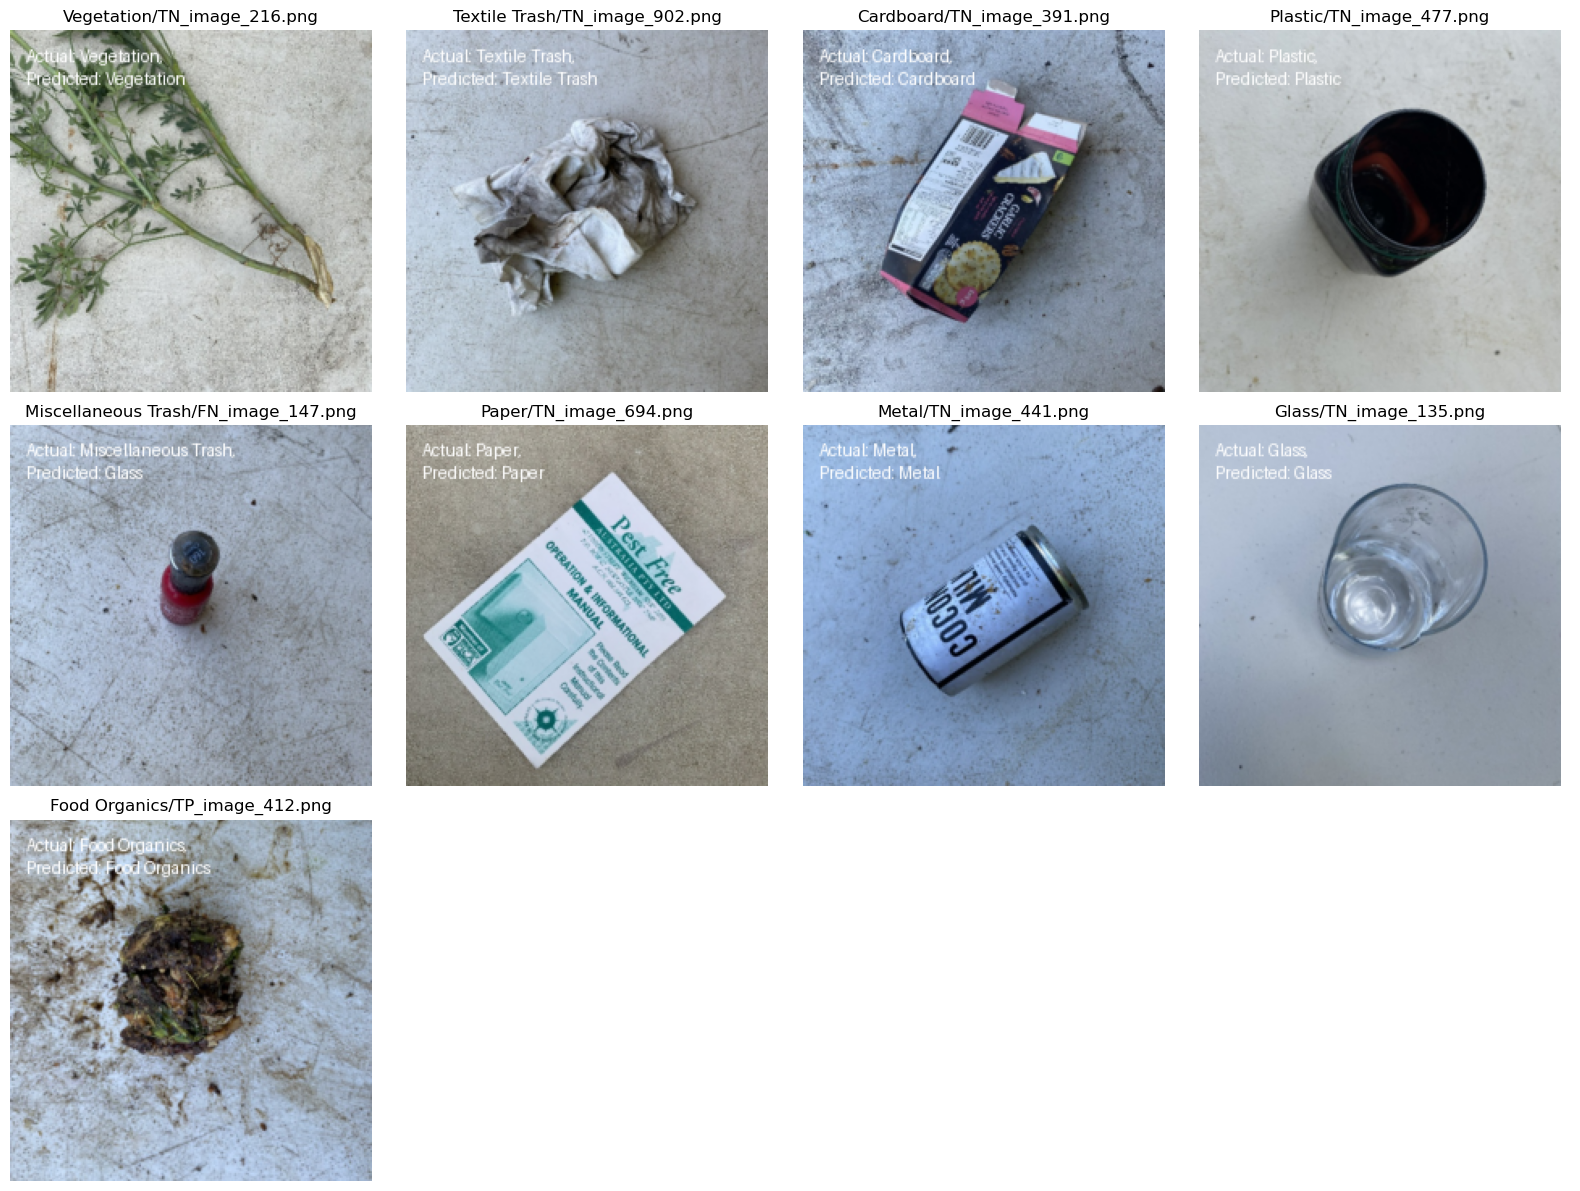

In [144]:
explorer.display_random_images_from_classes(stage="val")

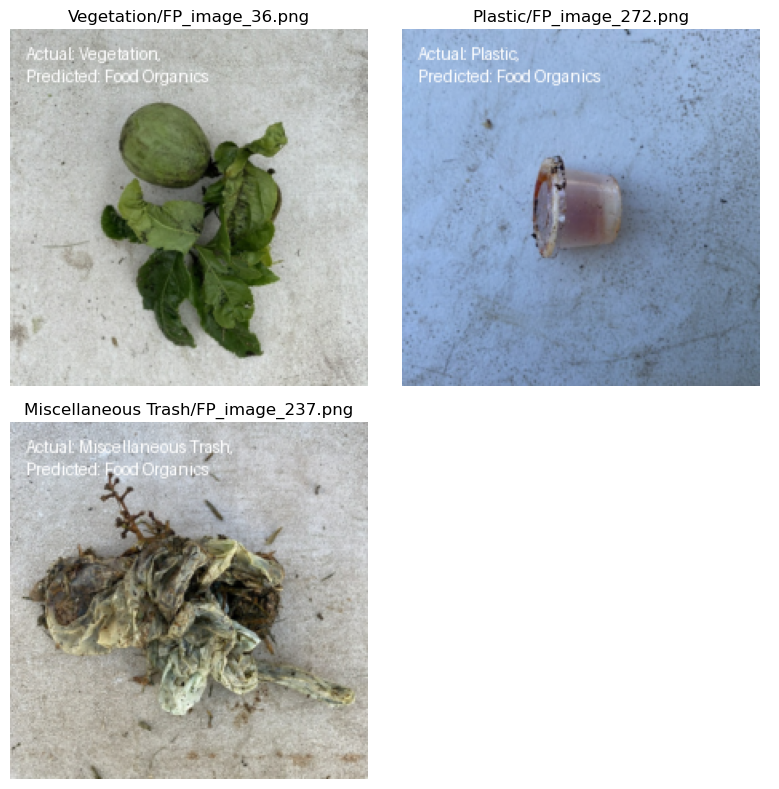

In [145]:
explorer.display_random_images_from_classes(stage="val", label_filter="FP")

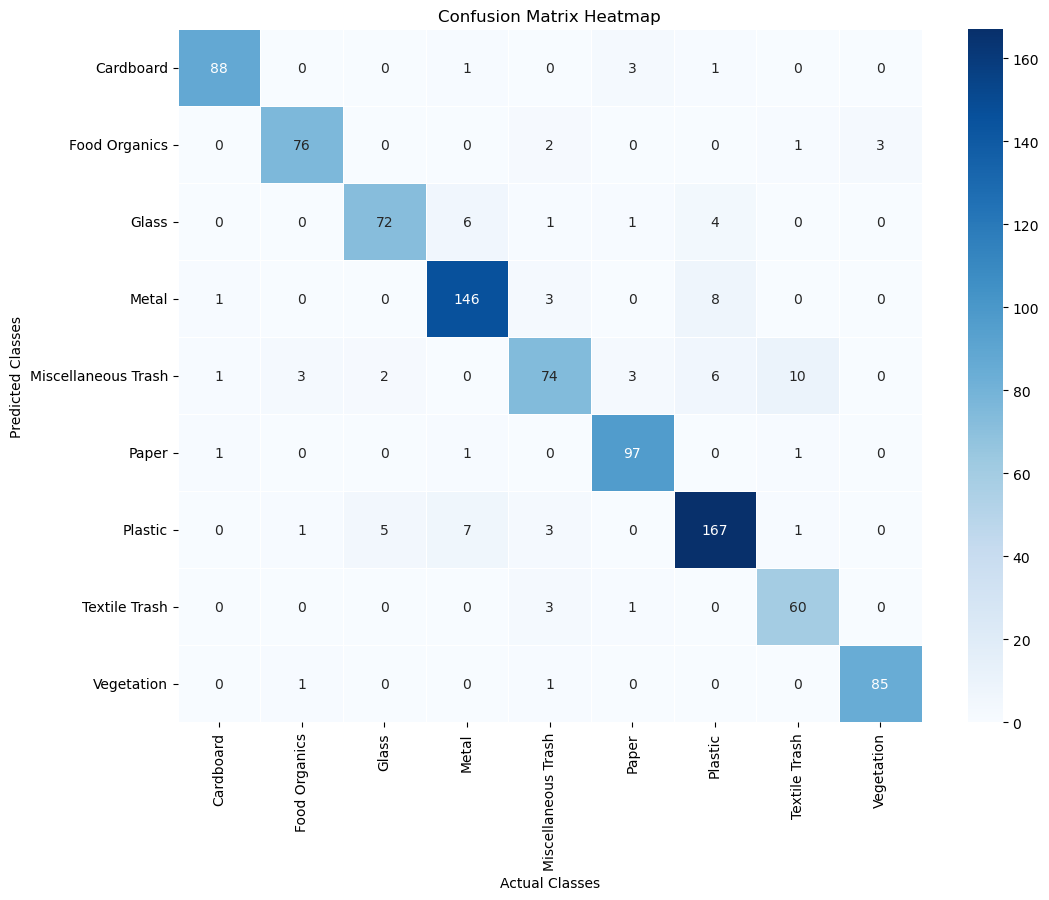

In [146]:
explorer.plot_confusion_matrix(stage="val")

In [130]:
explorer.get_test_results_on_our_data()

,epoch,our_test_data_acc,our_test_data_f1,our_test_data_loss,our_test_data_precision,our_test_data_recall,step,test_avg_inference_time_per_image
48,11,0.295704,0.292697,1.343117,0.37667,0.295704,1309,0.002514


In [136]:
explorer.get_train_results()

,epoch,step,train_acc_epoch,train_f1_epoch,train_loss_epoch,train_precision_epoch,train_recall_epoch
3,0,118,0.571543,0.529471,1.241183,0.563768,0.571543
7,1,237,0.843093,0.825801,0.485717,0.846393,0.843093
12,2,356,0.923330,0.909085,0.268307,0.915772,0.923330
16,3,475,0.971877,0.964499,0.138578,0.966133,0.971877
20,4,594,0.991149,0.987663,0.079184,0.987470,0.991149
25,5,713,0.994024,0.992040,0.050549,0.991716,0.994024
29,6,832,0.994582,0.994343,0.035849,0.994646,0.994582
34,7,951,0.999108,0.997692,0.026734,0.997311,0.999108
38,8,1070,0.999461,0.998317,0.021102,0.998003,0.999461
42,9,1189,0.998878,0.998961,0.017106,0.999065,0.998878


In [137]:
explorer.get_val_results()

,epoch,step,val_acc,val_avg_inference_time_per_image,val_f1,val_loss,val_precision,val_recall
2,0,118,0.788654,0.000806,0.765602,0.658519,0.793051,0.788654
6,1,237,0.845543,0.000627,0.818228,0.454021,0.836825,0.845543
11,2,356,0.867575,0.000618,0.852177,0.371100,0.868483,0.867575
15,3,475,0.886176,0.000569,0.867405,0.332450,0.879319,0.886176
19,4,594,0.889661,0.000577,0.869414,0.322117,0.882351,0.889661
24,5,713,0.896325,0.000599,0.878696,0.319636,0.891801,0.896325
28,6,832,0.885169,0.000661,0.866414,0.327091,0.879814,0.885169
33,7,951,0.892994,0.000599,0.876311,0.309406,0.890528,0.892994
37,8,1070,0.896216,0.000568,0.878749,0.304463,0.889559,0.896216
41,9,1189,0.892518,0.000588,0.877673,0.325020,0.893498,0.892518


## Bewertung

In [ ]:
# Hier steht vielleicht eine vergleichende Tabelle

**Bewertung des Modelle**

xxx

**Bewertung des Projekterfolgs**

Unter Rückbzug auf die in der Phase des Projektauftrags definierte Zielsetzung lässt sich der **Projekterfolg** bewerten. Zunächst ist die Vorhersagegenauigkeit von über 90% als Erfolgskriterium zu bewerten. Diese von von mehreren Modellen erreicht und lässt demnach auf ein erfolgreiches Projekt schließen. Des weiteren wird die Effizienz der Modelle unter Betrachtung der Inferenzzeit, Modellgröße und Komplexität bewertet. Die sehr gute Modellleistung des Vision Transformers geht mit einer hohen Modellgröße einher.

**Hier Text ergänzen**

Ein weiteres Kriterium stellt die Generalisierbarkeit des Modells dar. Diese wurde durch den Test des Modells mit neuen, selsbt erstellten Testdaten geprüft. Das **xxx** konnte hier eine Genauigkeit von **xxx** erreichen. Die Generalisierbarkeit des Modells kann somit als Erfolg angesehen werden.

Zuletzt ist der Nutzen des Projekts als Erfolgskriterium zu bewerten. Wie bereits in der Phase des Projektauftrags beschrieben, sind die Ergebnisse und Erkenntnisse des Projektes für eine Vielzahl von Stakeholdern von Bedeutung und mehrwertstiftend. Ferner werden in der Phase der Nutzung drei ausgewählte Anwedungsfelder für die erarbeiteten Modelle skizziert. Dieses Kriterium kann somit als erfüllt betrachtet werden.

## Empfehlungen für Stakeholder

Für potenzielle **Stakeholder** des Projekts, insbesondere für diejenigen, die die Implementierung des Machine Learning-Modells zur Müllklassifizierung in Erwägung ziehen, gibt es mehrere **Empfehlungen**.

Vor der Implementierung des Modells sollte eine umfassende Validierung sowie Evaluierung durchgeführt werden, um die Funktionsfähigkeit des Modells in der realen Umgebung sicherzustellen. Dies kann beispielsweise durch kontrollierte Tests oder Pilotprojekte erfolgen. Des Weiteren sollte die erforderliche Infrastruktur sowie die benötigten Ressourcen für die Implementierung vorhanden sein. Außerdem ist es sinnvoll, dem zukünftig mit dem Modell arbeitenden Personal Schulungen hinsichtlich der Nutzung, Fehlerbehebung sowie Wartung anzubieten. Weitergehend wird empfohlen, ein Monitoring einzurichten, um die Leistungsfähigkeit des Modells kontinuierlich zu überwachen und somit möglichen Anpassungsbedarf frühzeitig zu ermitteln. Unter Beachtung dieser Empfehlungen können potenzielle Stakeholder eine erfolgreiche Implementierung des Machine-Learning-Modells zur Müllklassifizierung erreichen und somit einen positiven Beitrag zur Müllentsorgung und -recycling leistet.

# Nutzung

Die fünfte und letzte Phase eines Projekts im Sinne des DASC-PM von [Schulz et al. 2022](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf) stellt die Nutzung dar. Obgleich die Verwendung von Data-Science-Analyseartefakten nicht als primärer Teil des Data-Science-Projekts angesehen wird, betont das Modell unter anderem die Wichtigkeit des Monitorings des Artefakts in der Anwendung. ([ebd., S. 19-20](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf))

Die im Rahmen dieses Projektes erarbeiteten Modelle zur Müllklassifikation eröffnen zahlreiche Möglichkeiten für zukünftige Anwendungen und Entwicklungen.

Eine vielversprechende **Anwendung** ist die Integration des Modells in eine mobile Applikation, die Benutzern beim korrekten Trennen von Müll hilft. Diese App könnte den Benutzern dabei helfen, den Müll korrekt zu identifizieren und zu sortieren, was zu einer effizienteren Mülltrennung und Recycling beitragen würde.

Darüber hinaus könnte das Modell in Mülltrennungsanlagen auf Deponien implementiert werden, um den Prozess der automatischen Müllsortierung zu verbessern. Durch die Verwendung von maschinellem Lernen könnten Mülltrennungsanlagen effizienter arbeiten und eine höhere Genauigkeit bei der Sortierung verschiedener Abfallarten erreichen.

Ein weiterer Anwendungsfall besteht in der Implementierung des Modells in eine Mülltonne, die den Müll automatisch sortiert. Ein Beispiel dafür ist AlphaTrash, ein Müllklassifikationssystem, das Convolutional Neural Networks verwendet [Tiyajamorn et al. 2019](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9095775).

Die Phase der Nutzung im Sinne des DASC-PM von [Schulz et al. 2022](https://info.nordakademie.de/hubfs/Website%20Relaunch%202022/Forschungsthemen/DASC_PM_v1.1-engl.pdf) sieht weiterführend ein kontinuierliches **Monitoring** von Data-Science-Analyseartefakten vor, um langfristig zuverlässige Ergebnisse zu gewährleisten. Dies ist besonders wichtig angesichts neuer Formen von Müll oder Verpackungen, die möglicherweise nicht im ursprünglichen Trainingsdatensatz enthalten waren. Des weiteren müssen mögliche neue rechtliche Vorschriften berücksichtigt werden, die sich auf die Mülltrennung und -entsorgung auswirken könnten. Dies könnte die Notwendigkeit einschließen, recyclebares Plastik oder andere besonders schwierige Materialien zu identifizieren und zu sortieren.

Eine **kritische Reflexion** über die Ausarbeitung ist von entscheidender Bedeutung, um die Einschränkungen des entwickelten Modells angemessen zu verstehen und anzuerkennen. Vor diesem Hintergrund ist anzumerken, dass das Modell ausschließlich auf einem Trainingsdatensatz aus Wollongong, New South Wales, Australien, trainiert wurde und ausschließlich mit Müll aus Australien und Deutschland validiert und getestet wurde. Es ist von hoher Relevanz, die regionalen Unterschiede in Bezug auf die Zusammensetzung von Müll und die gängigen Trennverfahren zu berücksichtigen. Infolgedessen besteht die Möglichkeit, dass das Modell möglicherweise nicht in der Lage ist, Müll aus anderen Ländern korrekt zu klassifizieren.

Des Weiteren sind Aspekte wie Mischmüll oder Mehrkomponentenmüll sowie regionale Unterschiede in den Trennverfahren als potenzielle Herausforderungen zu betrachten, welche die Wirksamkeit des Modells beeinflussen können. Die Notwendigkeit, diese Aspekte in zukünftigen Entwicklungen zu berücksichtigen und das Modell entsprechend anzupassen, ist von wesentlicher Bedeutung, um eine breitere Anwendbarkeit und Genauigkeit sicherzustellen.

Insgesamt bietet diese Arbeit zahlreiche Impulse für die Verbesserung der Mülltrennung und -entsorgung sowie diverse **Anknüpfungspunkte für weiterführende Forschungen**, wie beispielsweise die Erweiterung auf zusätzliche Regionen, die Integration in praktische Anwendungen und die weitere Verbesserung der Modellleistung.